In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [35]:
data = pd.read_csv('train.csv')

In [8]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

In [9]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

In [10]:
data_train = data[1000:m].T
Y_train = data_train[0].astype(int)
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [11]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2


In [12]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [13]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [14]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [15]:
def ReLU_deriv(Z):
    return Z > 0


In [16]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [17]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [18]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [19]:
def get_predictions(A2):
    return np.argmax(A2, 0)

In [20]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


In [21]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [22]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[3 7 3 ... 7 3 3] [2 3 1 ... 9 4 8]
0.1197560975609756
Iteration:  10
[9 6 2 ... 4 9 0] [2 3 1 ... 9 4 8]
0.23897560975609755
Iteration:  20
[2 6 2 ... 4 9 8] [2 3 1 ... 9 4 8]
0.33602439024390246
Iteration:  30
[2 6 2 ... 4 9 8] [2 3 1 ... 9 4 8]
0.42217073170731706
Iteration:  40
[2 6 1 ... 4 9 8] [2 3 1 ... 9 4 8]
0.4860243902439024
Iteration:  50
[2 6 1 ... 4 9 8] [2 3 1 ... 9 4 8]
0.5364146341463415
Iteration:  60
[2 6 1 ... 4 9 8] [2 3 1 ... 9 4 8]
0.5777073170731707
Iteration:  70
[2 5 1 ... 4 9 8] [2 3 1 ... 9 4 8]
0.6115365853658536
Iteration:  80
[2 5 1 ... 4 9 8] [2 3 1 ... 9 4 8]
0.6406829268292683
Iteration:  90
[2 5 1 ... 4 9 8] [2 3 1 ... 9 4 8]
0.665219512195122
Iteration:  100
[2 5 1 ... 4 9 8] [2 3 1 ... 9 4 8]
0.6872926829268293
Iteration:  110
[2 5 1 ... 4 9 8] [2 3 1 ... 9 4 8]
0.704170731707317
Iteration:  120
[2 5 1 ... 9 9 8] [2 3 1 ... 9 4 8]
0.719
Iteration:  130
[2 5 1 ... 9 9 8] [2 3 1 ... 9 4 8]
0.7319756097560975
Iteration:  140
[2 5 1 ... 9 

In [23]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [32]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

ev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(ev_predictions, Y_dev)

[5 0 0 7 1 2 0 4 8 0 8 2 2 6 9 3 3 2 7 5 6 2 9 7 0 2 3 9 7 5 0 1 0 7 3 1 8
 3 6 1 0 0 3 3 1 3 2 4 9 7 4 4 8 2 6 1 6 4 1 6 0 8 2 5 5 1 5 4 3 9 4 3 5 1
 8 9 0 7 5 9 7 7 7 6 7 6 5 4 5 0 6 0 0 7 2 2 0 5 4 9 3 6 7 4 6 2 6 2 4 4 0
 9 6 5 8 6 4 7 8 4 1 9 2 4 3 4 8 6 3 3 6 0 1 0 5 0 9 7 1 9 8 1 2 9 6 3 9 0
 5 8 8 6 7 1 3 3 7 1 9 2 1 4 2 7 6 8 8 1 4 0 4 8 6 6 8 3 1 0 6 9 2 3 2 8 2
 1 0 6 4 5 4 9 9 9 3 4 8 1 3 2 5 1 1 4 5 1 1 8 5 4 8 6 2 4 9 8 3 3 2 7 2 6
 3 5 4 0 2 0 0 0 6 7 8 0 3 9 0 8 5 8 0 9 6 1 9 4 5 3 4 2 0 5 9 2 5 3 0 1 6
 2 1 1 1 9 3 7 8 9 1 0 5 8 4 8 0 0 8 9 8 4 4 7 0 1 9 9 1 2 8 7 6 7 4 9 2 0
 0 8 9 5 9 7 3 4 3 4 4 7 0 9 1 2 0 7 9 2 4 9 3 8 1 4 3 2 2 1 0 9 8 3 8 1 4
 0 5 3 0 6 4 1 1 2 1 2 6 6 5 8 7 1 9 6 3 8 9 0 1 3 0 4 7 6 7 1 0 7 1 4 9 7
 6 9 0 9 7 2 2 2 7 9 9 9 6 7 5 9 9 3 0 3 4 2 6 0 7 0 0 5 1 6 1 4 7 3 4 3 0
 0 0 6 7 7 4 9 4 2 4 7 9 3 9 0 6 9 3 7 4 8 3 6 8 5 6 1 7 7 7 6 8 1 3 4 5 7
 7 9 7 7 0 6 3 2 1 2 2 3 7 2 9 6 1 3 2 7 0 2 2 2 1 8 1 3 7 7 2 4 4 6 9 0 0
 5 2 7 7 0 9 3 9 1 2 4 9 

0.872

Prediction:  [0]
Label:  3


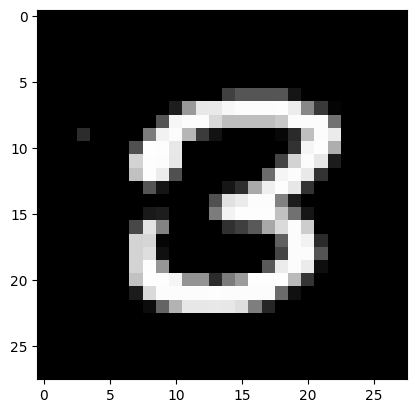

In [33]:
test_prediction(1, W1, b1, W2, b2)